## DS 301 Lab - 3

## Polynomial Regression - <br>

A portion of the code & theory has been taken from the book - Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems by A. Geron
A portion of visualization has been taken from Kaggle kernels - COMPREHENSIVE DATA EXPLORATION WITH PYTHON
Pedro Marcelino - February 2017 https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python


### Instructions -<br>
1. Please go over the sample code shown below and use it as reference for your class project <br>
2. Perform Polynomial Regression on the Ames Housing dataset features and come up with a degree parameter that fits the data<br>
3. The dataset and its description can be downloaded from here - <br>https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data <br>
4. We expect you to come up with following linear & polynomial regression models from selected features -<br>
    4.1. Perform linear & polynomial regression with 'Sale Price' as the target and 'Year Built' as the input. <br>
    4.2. Perform linear & polynomial regression with 'Sale Price' as the target with inputs 'Year Built' and 'Overall Quality'. , with degree=3<br>
    4.3. Evaluate all your models using MSE<br>
    4.4. Evaluate all your models using RMSE <br>
5. Observe the code running times for different degrees and features. Try to come up with an explanation for the same <br>
6. Feel free to contact the TA/Instructor in case you have any questions!<br>
  
    

Data fields <br>
Here's a brief version of what you'll find in the data description file. <br>

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict. <br>
MSSubClass: The building class <br>
MSZoning: The general zoning classification <br>
LotFrontage: Linear feet of street connected to property <br>
LotArea: Lot size in square feet <br>
Street: Type of road access <br>
Alley: Type of alley access <br>
LotShape: General shape of property <br>
LandContour: Flatness of the property <br>
Utilities: Type of utilities available <br>
LotConfig: Lot configuration <br>
LandSlope: Slope of property <br>
Neighborhood: Physical locations within Ames city limits <br>
Condition1: Proximity to main road or railroad <br>
Condition2: Proximity to main road or railroad (if a second is present) <br>
BldgType: Type of dwelling <br>
HouseStyle: Style of dwelling <br>
OverallQual: Overall material and finish quality <br>
OverallCond: Overall condition rating <br>
YearBuilt: Original construction date <br>
YearRemodAdd: Remodel date <br>
RoofStyle: Type of roof <br>
RoofMatl: Roof material <br>
Exterior1st: Exterior covering on house <br>
Exterior2nd: Exterior covering on house (if more than one material) <br>
MasVnrType: Masonry veneer type <br>
MasVnrArea: Masonry veneer area in square feet <br>
ExterQual: Exterior material quality <br>
ExterCond: Present condition of the material on the exterior <br>
Foundation: Type of foundation <br>
BsmtQual: Height of the basement <br>
BsmtCond: General condition of the basement <br>
BsmtExposure: Walkout or garden level basement walls <br>
BsmtFinType1: Quality of basement finished area <br>
BsmtFinSF1: Type 1 finished square feet <br>
BsmtFinType2: Quality of second finished area (if present) <br>
BsmtFinSF2: Type 2 finished square feet <br>
BsmtUnfSF: Unfinished square feet of basement area <br>
TotalBsmtSF: Total square feet of basement area <br>
Heating: Type of heating <br>
HeatingQC: Heating quality and condition <br>
CentralAir: Central air conditioning <br>
Electrical: Electrical system <br>
1stFlrSF: First Floor square feet <br>
2ndFlrSF: Second floor square feet <br>
LowQualFinSF: Low quality finished square feet (all floors) <br>
GrLivArea: Above grade (ground) living area square feet <br>
BsmtFullBath: Basement full bathrooms <br>
BsmtHalfBath: Basement half bathrooms <br>
FullBath: Full bathrooms above grade <br>
HalfBath: Half baths above grade <br>
Bedroom: Number of bedrooms above basement level <br>
Kitchen: Number of kitchens <br>
KitchenQual: Kitchen quality <br>
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) <br>
Functional: Home functionality rating <br>
Fireplaces: Number of fireplaces <br>
FireplaceQu: Fireplace quality <br>
GarageType: Garage location <br>
GarageYrBlt: Year garage was built <br>
GarageFinish: Interior finish of the garage <br>
GarageCars: Size of garage in car capacity <br>
GarageArea: Size of garage in square feet <br>
GarageQual: Garage quality <br>
GarageCond: Garage condition <br>
PavedDrive: Paved driveway <br>
WoodDeckSF: Wood deck area in square feet <br>
OpenPorchSF: Open porch area in square feet <br>
EnclosedPorch: Enclosed porch area in square feet <br>
3SsnPorch: Three season porch area in square feet <br>
ScreenPorch: Screen porch area in square feet <br>
PoolArea: Pool area in square feet <br>
PoolQC: Pool quality <br>
Fence: Fence quality <br>
MiscFeature: Miscellaneous feature not covered in other categories <br>
MiscVal: Value of miscellaneous feature <br>
MoSold: Month Sold <br>
YrSold: Year Sold <br>
SaleType: Type of sale <br>
SaleCondition: Condition of sale <br>

#### Setting up libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("datasets/House-price/house-price.csv")

In [3]:
df.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

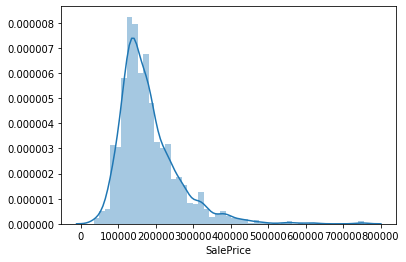

In [6]:
#histogram
sns.distplot(df['SalePrice']);

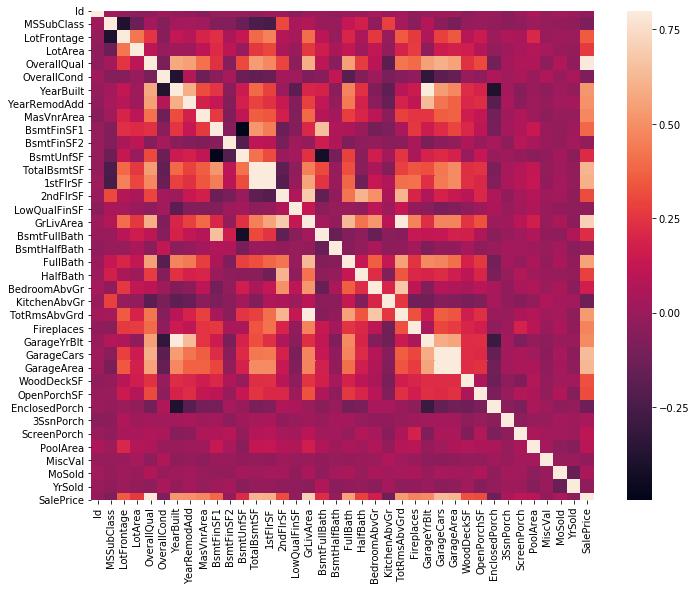

In [7]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

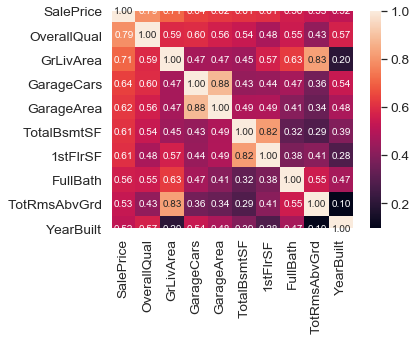

In [8]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
#this will take a long time to run
#sns.pairplot(df)

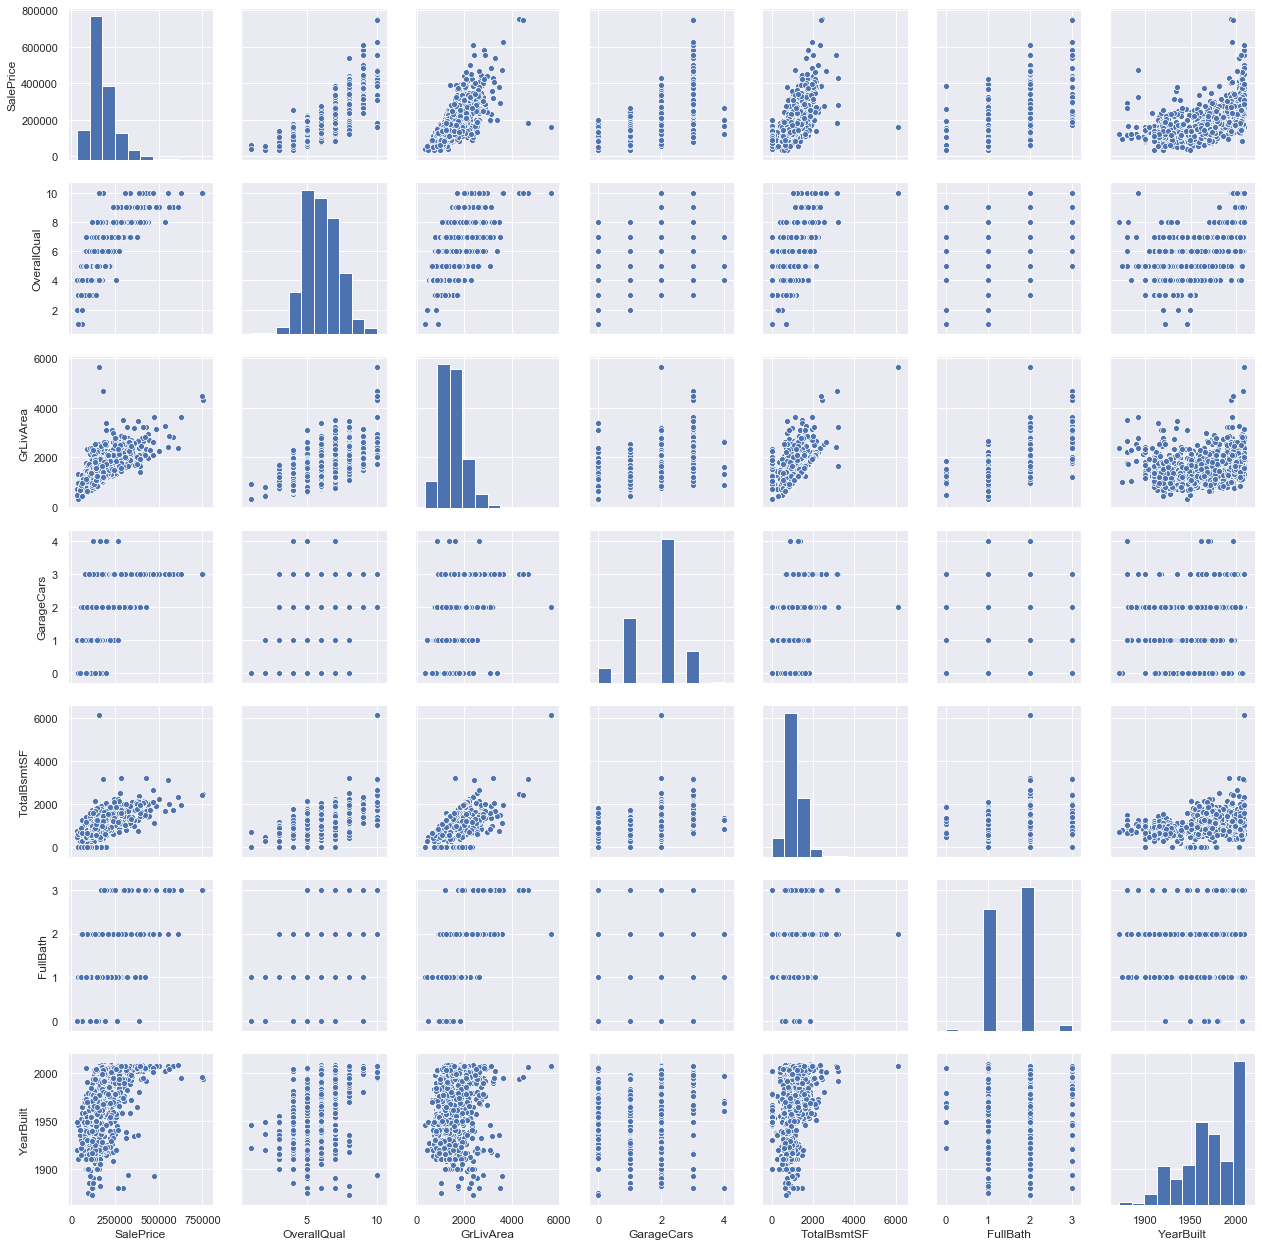

In [10]:
#selected fewer feature for pairplot (scatterplot matrix)
#let's select fewer features that having hige correlation with our target SalePrice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height = 2.5)
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


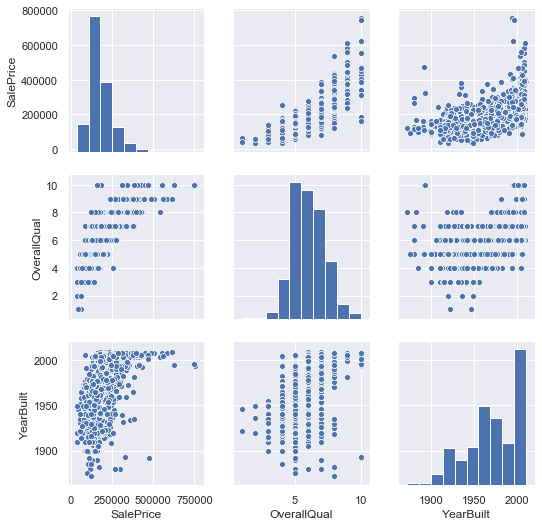

In [11]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

### Start with Linear regression between YearBuilt and Sale Price

In [12]:
X=df['YearBuilt']
X=X.values.reshape(-1,1)
X
y=df['SalePrice']

Linear Model (degree=1)

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [14]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#poly_features = PolynomialFeatures(degree=1, include_bias=False)
#X_poly = poly_features.fit_transform(X_train)

In [15]:
print(X_train)

[[2007]
 [1961]
 [1930]
 ...
 [1954]
 [1988]
 [1969]]


In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

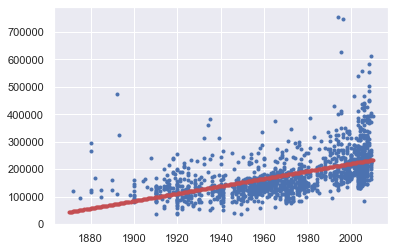

In [17]:
X_label=np.linspace(1870, 2010, 292).reshape(292, 1)

y_pred = lin_reg.predict(X_label)

plt.plot(X,y,"b.")
plt.plot(X_label,y_pred,"r.")
plt.show()

In [18]:
y_pred = lin_reg.predict(X_test)

In [19]:
mean_squared_error(y_test, y_pred)

4703632390.309974

In [20]:
#RMSE
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred))

68583.03281650625

### Polynomial regression between Lot Area and Sale Price, degree=2

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)


In [27]:
print(X_poly)

[[1.977000e+03 3.908529e+06]
 [2.003000e+03 4.012009e+06]
 [2.001000e+03 4.004001e+06]
 ...
 [2.004000e+03 4.016016e+06]
 [2.000000e+03 4.000000e+06]
 [1.931000e+03 3.728761e+06]]


In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
X_new=np.linspace(1870, 2020, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

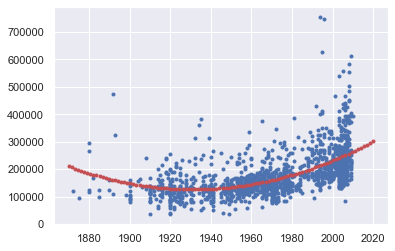

In [34]:
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r.")
plt.show()

In [36]:
X_test_poly = poly_features.fit_transform(X_test)

In [37]:
y_pred = lin_reg.predict(X_test_poly)

In [38]:
mean_squared_error(y_test, y_pred)

4697108551.667874

In [39]:
#RMSE
from math import sqrt
sqrt(mean_squared_error(y_test, y_pred))

68535.4547053412

In [ ]:
#Continue with the rest of questions:
# 4.2. Perform linear & polynomial regression with 'Sale Price' as the target with inputs 'Year Built' and 'Overall Quality'. Degree=3
# 4.3. Be mindful of the categorical variables
# 4.4. Evaluate all your models using RMSE